### ***Poisson random variable***

The `numpy.random` module also has a number of useful probability distributions for both discrete and continuous random variables. In this exercise, you will learn how to draw samples from a probability distribution.

In particular, you will draw samples from a very important discrete probability distribution, the ***Poisson*** distribution, which is typically used for modeling the average rate at which events occur.

Following the exercise, you should be able to apply these steps to any of the probability distributions found in `numpy.random`. In addition, you will also see how the sample mean changes as we draw more samples from a distribution.

* Using `np.random.poisson()` draw samples from a Poisson distribution using `lam` (lambda) and `size_1`.

* Repeat the above step, but this time use `size_2`.

* For each of the above samples, calculate the absolute difference between their mean and lambda using `np.mean()` and `abs()`.

In [2]:
import numpy as np

# Initialize seed and parameters
np.random.seed(123) 
lam, size_1, size_2 = 5, 3, 10000000  

# Draw samples & calculate absolute difference between lambda and sample mean
samples_1 = np.random.poisson(lam, size_1)
samples_2 = np.random.poisson(lam, size_2)
answer_1 = abs(np.mean(samples_1) - lam)
answer_2 = abs(np.mean(samples_2) - lam) 

print("|Lambda - sample mean| with {} samples is {} and with {} samples is {}. ".format(size_1, answer_1, size_2, answer_2))

|Lambda - sample mean| with 3 samples is 0.33333333333333304 and with 10000000 samples is 0.0007102999999997195. 


Why do you think the larger size gives us a better result?

### ***Shuffling a deck of cards***

Often times we are interested in randomizing the order of a set of items. Consider a game of cards where you first shuffle the deck of cards or a game of scrabble where the letters are first mixed in a bag. You will learn another useful function - **`np.random.shuffle()`**. This function allows you to randomly shuffle a sequence in place. At the end of this exercise, you will know how to shuffle a deck of cards or any sequence of items.

* Use the **`np.random.shuffle()`** function to shuffle `deck_of_cards`.

* Select the top three cards from this list by slicing.

In [3]:
import numpy as np

deck_of_cards = [('Heart', 0),  ('Heart', 1), ('Heart', 2), ('Heart', 3), ('Heart', 4), ('Heart', 5), ('Heart', 6), ('Heart', 7), ('Heart', 8), ('Heart', 9), ('Heart', 10), ('Heart', 11), ('Heart', 12), ('Club', 0), ('Club', 1), ('Club', 2), ('Club', 3), ('Club', 4), ('Club', 5), ('Club', 6), ('Club', 7), ('Club', 8), ('Club', 9), ('Club', 10), ('Club', 11), ('Club', 12), ('Spade', 0), ('Spade', 1), ('Spade', 2), ('Spade', 3), ('Spade', 4), ('Spade', 5), ('Spade', 6), ('Spade', 7), ('Spade', 8), ('Spade', 9), ('Spade', 10), ('Spade', 11), ('Spade', 12), ('Diamond', 0), ('Diamond', 1), ('Diamond', 2), ('Diamond', 3), ('Diamond', 4), ('Diamond', 5), ('Diamond', 6), ('Diamond', 7), ('Diamond', 8), ('Diamond', 9), ('Diamond', 10), ('Diamond', 11), ('Diamond', 12)]
# Shuffle the deck
np.random.shuffle(deck_of_cards)

# Print out the top three cards
card_choices_after_shuffle = deck_of_cards[:3]
print(card_choices_after_shuffle)


[('Club', 3), ('Spade', 5), ('Diamond', 7)]


### ***Throwing a fair die***

Once you grasp the basics of designing a simulation, you can apply it to any system or process. Next, we will learn how each step is implemented using some basic examples.

As we have learned, simulation involves ***repeated random sampling***. The first step then is to get one random sample. Once we have that, all we do is repeat the process multiple times. This exercise will focus on understanding how we get one random sample. We will study this in the context of throwing a fair six-sided die.

By the end of this exercise, you will be familiar with how to implement the first two steps of running a simulation - defining a random variable and assigning probabilities.

* Construct a six-sided die as a list of each of the possible outcomes and assign it to the variable `die`.

* Define the probability of each of the six sides having an equal chance of showing up and assign it to the variable probabilities.

* Finally, use **`np.random.choice()`** to simulate a single throw of the die and record its outcome in the `outcome` variable.

In [12]:
np.random.seed(123)

# Define die outcomes and probabilities
die, probabilities, throws = [1, 2, 3, 4, 5, 6], [1/6]*6, 1

# Use np.random.choice to throw the die once and record the outcome
outcome = np.random.choice(die, size=throws, p=probabilities)
print("Outcome of the throw: {}".format(outcome[0]))

Outcome of the throw: 5


 What do you think will happen if the probabilities are not all the same?

 ### ***Throwing two fair dice***

Often times, our simulation will involve not just one, but multiple random variables. Consider a game where you throw two dice and win if each die shows the same number. Here we have two random variables - the two dice - and a relationship between each of them - we win if they show the same number, lose if they don't. In reality, the relationship between random variables can be much more complex, especially when simulating things like weather patterns.

By the end of this exercise, you will be familiar with how to implement the third step of running a simulation - defining relationships between random variables.

* Set `num_dice` to `2`.

* Complete the **`np.random.choice()`** function to throw two dice and record the outcomes in the `outcomes` variable.

* Fill in the Boolean condition to check if the two dice show the same number.

In [13]:
np.random.seed(223)

# Initialize number of dice, simulate & record outcome
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6]*6, 2
outcomes = np.random.choice(die, size=num_dice, p=probabilities) 

# Win if the two dice show the same number
if outcomes[0] == outcomes[1]: 
    answer = 'win' 
else:
    answer = 'lose'

print("The dice show {} and {}. You {}!".format(outcomes[0], outcomes[1], answer))

The dice show 5 and 5. You win!


### ***Simulating the dice game***

We now know how to implement the first three steps of a simulation. Now let's consider the next step - repeated random sampling.

Simulating an outcome once doesn't tell us much about how often we can expect to see that outcome. In the case of the dice game from the previous exercise, it's great that we won once. But suppose we want to see how many times we can expect to win if we played this game multiple times, we need to repeat the random sampling process many times. Repeating the process of random sampling is helpful to understand and visualize inherent uncertainty and deciding next steps.

Following this exercise, you will be familiar with implementing the fourth step of running a simulation - sampling repeatedly and generating outcomes.

* Set `sims` to `100` repetitions and initialize `wins` to `0`.
* Write a **`for`** loop to repeat throwing the dice.
* Set `outcomes` to the outcome of throwing two dice.
* If the two dice show the same number, increment `wins` by 1.

In [15]:
import numpy as np 

np.random.seed(223)

# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
sims, wins = 100, 0

for i in range(sims):
    outcomes = np.random.choice(die, size=num_dice, p=probabilities) 
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0] == outcomes[1]: 
        wins = wins + 1 

print("In {} games, you win {} times".format(sims, wins))

In 100 games, you win 25 times


### ***Simulating one lottery drawing***


We will use simulations to figure out whether or not we want to buy a lottery ticket. Suppose you have the opportunity to buy a lottery ticket which gives you a shot at a grand prize of $10,000. Since there are 1000 tickets in total, your probability of winning is 1 in 1000. Each ticket costs $10. Let's use our understanding of basic simulations to first simulate one drawing of the lottery.

* Define `chance_of_winning` as the probability of winning the lottery.
* Remember that `1` out of the total number of lottery tickets sold will win.
* Set the `probability` list to the probabilities of receiving corresponding `gains` using `chance_of_winning`.
* Use **`np.random.choice()`** to perform one simulation of this lottery drawing.

In [16]:
import numpy as np 

np.random.seed(123)

# Pre-defined constant variables
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000

# Probability of winning
chance_of_winning = 1/num_tickets

# Simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probability = [1-chance_of_winning, chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)

print("Outcome of one drawing of the lottery is {}".format(outcome))

Outcome of one drawing of the lottery is [-10]


### ***Should we buy?***

In the last exercise, we simulated the random drawing of the lottery ticket once. In this exercise, we complete the simulation process by repeating the process multiple times.

Repeating the process gives us multiple outcomes. We can think of this as multiple universes where the same lottery drawing occurred. We can then determine the average winnings across all these universes. If the average winnings are greater than what we pay for the ticket then it makes sense to buy it, otherwise, we might not want to buy the ticket.

This is typically how simulations are used for evaluating business investments. After completing this exercise, you will have the basic tools required to use simulations for decision-making.

* Set the `size` parameter, which controls the number of simulations, to `2000`.

* Set `payoffs` equal to a list containing how much you could lose and how much you could win.

* Set `probs` equal to a list of probabilities of losing and winning.

* Calculate the mean of `outcomes` and assign it to `answer`.

In [17]:
import numpy as np 

np.random.seed(122)

# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning, chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = outcomes.mean()
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 2000 simulations = -10.0


 Is it worth spending $10 on the ticket for this average payoff?

 ### ***Calculating a break-even lottery price***

Simulations allow us to ask more nuanced questions that might not necessarily have an easy analytical solution. Rather than solving a complex mathematical formula, we directly get multiple sample outcomes. We can run experiments by modifying inputs and studying how those changes impact the system. For example, once we have a moderately reasonable model of global weather patterns, we could evaluate the impact of increased greenhouse gas emissions.

In the lottery example, we might want to know how expensive the ticket needs to be for it to not make sense to buy it. To understand this, we need to modify the ticket cost to see when the expected payoff is negative.

`grand_prize`, `num_tickets`, and `chance_of_winning` are loaded in the environment.

* Set `sims` to `3000` and the `lottery_ticket_cost` variable to `0`.

* If the mean value of outcomes falls below `0`, break out of the `while` loop.
  * Else, increment `lottery_ticket_cost` by `1`.

In [22]:
import numpy as np 

np.random.seed(333)

grand_prize, num_tickets, chance_of_winning = 10000, 1000, 0.001

# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 3000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    print(f'outcomes.mean() = {outcomes.mean():.2f}, lottery_ticket_cost = {lottery_ticket_cost}')
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

outcomes.mean() = 13.33, lottery_ticket_cost = 0
outcomes.mean() = 9.00, lottery_ticket_cost = 1
outcomes.mean() = 18.00, lottery_ticket_cost = 2
outcomes.mean() = 7.00, lottery_ticket_cost = 3
outcomes.mean() = 22.67, lottery_ticket_cost = 4
outcomes.mean() = 11.67, lottery_ticket_cost = 5
outcomes.mean() = 4.00, lottery_ticket_cost = 6
outcomes.mean() = 6.33, lottery_ticket_cost = 7
outcomes.mean() = 2.00, lottery_ticket_cost = 8
outcomes.mean() = 7.67, lottery_ticket_cost = 9
outcomes.mean() = -10.00, lottery_ticket_cost = 10
The highest price at which it makes sense to buy the ticket is 9


### ***Two of a kind***

Now let's use simulation to estimate probabilities. Suppose you've been invited to a game of poker at your friend's home. In this variation of the game, you are dealt five cards and the player with the better hand wins. You will use a simulation to estimate the probabilities of getting certain hands. Let's work on estimating the probability of getting at least two of a kind. Two of a kind is when you get two cards of different suites but having the same numeric value (e.g., 2 of hearts, 2 of spades, and 3 other cards).

By the end of this exercise, you will know how to use simulation to calculate probabilities for card games.

* **Deal the hand**: In the `for` loop, shuffle `deck_of_cards`. We then select the first 5 cards as our hand.

* **Count numeric values**: Utilize the `get()` method to construct the dictionary `cards_in_hand` which counts the occurrence of each `numeric_value` in hand.

* **Two of a kind?** Check if the largest value in `cards_in_hand` is equal to or greater than 2 to see if we have at least two of a kind. If yes, we increment `two_kind`.

In [23]:
import numpy as np

# Shuffle deck & count card occurrences in the hand
n_sims, two_kind = 10000, 0
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for [suite, numeric_value] in hand:
        # Count occurrences of each numeric value
        cards_in_hand[numeric_value] = cards_in_hand.get(numeric_value, 0) + 1
    
    # Condition for getting at least 2 of a kind
    if max(cards_in_hand.values()) >=2: 
        two_kind += 1

print("Probability of seeing at least two of a kind = {} ".format(two_kind/n_sims))

Probability of seeing at least two of a kind = 0.4958 


### ***Game of thirteen***

You have a deck of 13 cards, each numbered from 1 through 13. Shuffle this deck and draw cards one by one. A coincidence is when the number on the card matches the order in which the card is drawn. For instance, if the 5th card you draw happens to be a 5, it's a coincidence. You win the game if you get through all the cards without any coincidences. Let's calculate the probability of winning at this game using simulation.

By completing this exercise, you will further strengthen your ability to cast abstract problems into the simulation framework for estimating probabilities.

* For each drawing, draw all the cards in deck without replacement and assign to `draw`.

* Check if there are any coincidences in the `draw` and, if there are, increment the `coincidences` counter by 1.

* Calculate winning probability as the fraction of games without any coincidences and use `prob_of_winning` to print your results.

In [27]:
import numpy as np

# Pre-set constant variables
deck, sims, coincidences = np.arange(1, 14), 10000, 0

for _ in range(sims):
    # Draw all the cards without replacement to simulate one game
    draw = np.random.choice(deck, size=13, replace=False)
    # Check if there are any coincidences
    coincidence = (draw == list(np.arange(1, 14))).any()
    if coincidence == True: 
        coincidences += 1

# Calculate probability of winning
prob_of_winning = 1 - coincidences / sims
print("Probability of winning = {}".format(prob_of_winning))

Probability of winning = 0.37160000000000004


### ***The conditional urn***

We have an urn that contains 7 white and 6 black balls. Four balls are drawn at random. We'd like to know the probability that the first and third balls are white, while the second and the fourth balls are black.

* Initialize the counter `success` to `0` and `sims` to `5000`.

* Define a list, `urn`, with `7` white balls (`'w'`) and `6` black balls (`'b'`).
* Draw 4 balls without replacement and check to see if the first and third are white and second and fourth are black.

* Increment `success` if the above criterion is met.

In [28]:
# Initialize success, sims and urn
success, sims = 0, 5000
urn = ['w', 'w', 'w', 'w', 'w', 'w', 'w', 'b', 'b', 'b', 'b', 'b', 'b']

for _ in range(sims):
    # Draw 4 balls without replacement
    draw = np.random.choice(urn, replace=False, size=4)
    # Count the number of successes
    if (draw[0]=='w') & (draw[1]=='b') & (draw[2]=='w') & (draw[3]=='b'): 
        success +=1

print("Probability of success = {}".format(success/sims))

Probability of success = 0.0726


### ***Birthday problem***

How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?

With 366 people in a 365-day year, we are 100% sure that at least two have the same birthday, but we only need to be 50% sure. Simulation gives us an elegant way of solving this problem.

* Initialize the sample space `days` which is an array from `1` to `365`.

* Define a function `birthday_sim()` that takes one input `people` and returns the probability that at least two share the same birthday. Set `size` of `draw` to number of people.

* Call `birthday_sim()` in a `while` loop and `break` when the probability is greater than `0.5`.

In [29]:
import numpy as np

# Draw a sample of birthdays & check if each birthday is unique
days = np.arange(1, 366)
people = 2

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for _ in range(sims):
        draw = np.random.choice(days, size=people, replace=True)
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims
    return out

# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 23 people, there's a 50% chance that two share a birthday.


### ***Full house***

A full house is when you get two cards of different suits that share the same numeric value and three other cards that have the same numeric value (e.g., 2 of hearts & spades, jacks of clubs, diamonds, & spades).

Thus, a full house is the probability of getting exactly three of a kind conditional on getting exactly two of a kind of another value. Using the same code as before, modify the success condition to get the desired output. This exercise will teach you to estimate conditional probabilities in card games and build your foundation in framing abstract problems for simulation.

* Shuffle `deck_of_cards`.

* Utilize a dictionary with `.get()` to count the number of occurrences of each card in the hand.

* Increment the counter `full_house` when there is a full house in the hand (2 of one kind, 3 of the other).

In [33]:
import numpy as np

np.random.seed(123)

#Shuffle deck & count card occurrences in the hand
n_sims, full_house, deck_of_cards = 50000, 0, [('Heart', 0),  ('Heart', 1), ('Heart', 2), ('Heart', 3), ('Heart', 4), ('Heart', 5), ('Heart', 6), ('Heart', 7), ('Heart', 8), ('Heart', 9), ('Heart', 10), ('Heart', 11), ('Heart', 12), ('Club', 0), ('Club', 1), ('Club', 2), ('Club', 3), ('Club', 4), ('Club', 5), ('Club', 6), ('Club', 7), ('Club', 8), ('Club', 9), ('Club', 10), ('Club', 11), ('Club', 12), ('Spade', 0), ('Spade', 1), ('Spade', 2), ('Spade', 3), ('Spade', 4), ('Spade', 5), ('Spade', 6), ('Spade', 7), ('Spade', 8), ('Spade', 9), ('Spade', 10), ('Spade', 11), ('Spade', 12), ('Diamond', 0), ('Diamond', 1), ('Diamond', 2), ('Diamond', 3), ('Diamond', 4), ('Diamond', 5), ('Diamond', 6), ('Diamond', 7), ('Diamond', 8), ('Diamond', 9), ('Diamond', 10), ('Diamond', 11), ('Diamond', 12)]
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use .get() method to count occurrences of each card
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
        
    # Condition for getting full house
    condition = (max(cards_in_hand.values()) ==3) & (min(cards_in_hand.values())==2)
    if condition: 
        full_house += 1
print("Probability of seeing a full house = {}".format(full_house/n_sims))

Probability of seeing a full house = 0.0014


### ***Driving test***

Suppose that you are about to take a driving test. Based on your own practice and based on data you have gathered, you know that the probability of you passing the test is 90% when it's sunny and only 30% when it's raining. Your local weather station forecasts that there's a 40% chance of rain tomorrow. Based on this information, you want to know what is the probability of you passing the driving test tomorrow.

This is a simple problem and can be solved analytically. Here, you will learn how to model a simple DGP and see how it can be used for simulation.

* Write a function `test_outcome()`.

* Set `weather` as `'rain'` or `'sun'` depending on the input argument `p_rain` (the probability of rain).

* Set the appropriate probabilities of `'pass'` and `'fail'` in `test_result` using `weather` & the dictionary `p_pass`.

* Now let's compute the probability of passing the test.

  * First to count the number of times you pass using the collected results in `outcomes`.
  * Use this to calculate `pass_outcomes_frac` as fraction of pass outcomes.
  * Print `pass_outcomes_frac`.



In [1]:
import numpy as np

np.random.seed(222)

sims, outcomes, p_rain, p_pass = 1000, [], 0.40, {'sun':0.9, 'rain':0.3}

def test_outcome(p_rain):  
    # Simulate whether it will rain or not
    weather = np.random.choice(['rain', 'sun'], p=[p_rain, 1-p_rain])
    # Simulate and return whether you will pass or fail
    test_result = np.random.choice(['pass', 'fail'], p=[p_pass[weather], 1-p_pass[weather]])
    return test_result

for _ in range(sims):
    outcomes.append(test_outcome(p_rain))

# Calculate fraction of outcomes where you pass
pass_outcomes_frac = np.sum(np.array(outcomes) == 'pass')/len(outcomes)
print("Probability of Passing the driving test = {}".format(pass_outcomes_frac))

Probability of Passing the driving test = 0.654


### ***National elections***

* Consider national elections in a country with two political parties - Red and Blue. This country has 50 states and the party that wins the most states wins the elections. You have the probability $p$ of Red winning in each individual state and want to know the probability of Red winning nationally.

Let's model the DGP to understand the distribution. Suppose the election outcome in each state follows a binomial distribution with probability  $p$ such that 0 indicates a loss for Red and 1 indicates a win. We then simulate a number of election outcomes. Finally, we can ask rich questions like **what is the probability of Red winning less than 45% of the states?**

* Simulate one election using **`np.random.binomial()`** with `p = probs` and `n=1`. Assign it to `election`.

* Append the average of Red's wins in `election` to `outcomes`.

* Calculate the fraction of `outcomes` where Red won less than 45% of the states. Save it as `prob_red_wins` and use it to print your results.

In [4]:
import numpy as np
np.random.seed(224)

outcomes, sims, probs = [], 1000, np.array([0.52076814, 0.67846401, 0.82731745, 0.64722761, 0.03665174,
       0.17835411, 0.75296372, 0.22206157, 0.72778372, 0.28461556,
       0.72545221, 0.106571  , 0.09291364, 0.77535718, 0.51440142,
       0.89604586, 0.39376099, 0.24910244, 0.92518253, 0.08165597,
       0.4212476 , 0.74123879, 0.2479099 , 0.46125805, 0.19584491,
       0.24440482, 0.349916  , 0.80224624, 0.80186664, 0.82968251,
       0.91178779, 0.51739059, 0.67338858, 0.15675863, 0.37772308,
       0.77134621, 0.71727114, 0.92700912, 0.28386132, 0.25502498,
       0.30081506, 0.19724585, 0.29129564, 0.56623386, 0.97681039,
       0.96263926, 0.0548948 , 0.14092758, 0.54739446, 0.54555576])

for _ in range(sims):
    # Simulate elections in the 50 states
    election = np.random.binomial(p=probs, n=1)
    # Get average of Red wins and add to `outcomes`
    outcomes.append(election)

# Calculate probability of Red winning in less than 45% of the states
prob_red_wins = sum([1 for x in outcomes if np.sum(x) < 45/100 * 50]) / len(outcomes)

print("Probability of Red winning in less than 45% of the states = {}".format(prob_red_wins))

Probability of Red winning in less than 45% of the states = 0.196


### ***Fitness goals***

On days when you go to the gym, you average around 15k steps, and around 5k steps otherwise. You go to the gym 40% of the time. Let's model the step counts in a day as a Poisson random variable with a mean $\lambda$ dependent on whether or not you go to the gym.

For simplicity, let’s say 

* you have an 80% chance of losing 1lb and a 20% chance of gaining 1lb when you get more than 10k steps. 
* The probabilities are reversed when you get less than 8k steps. 
* Otherwise, there's an even chance of gaining or losing 1lb. 

Given all this information, find the probability of losing weight in a month.

* Simulate `steps` as a Poisson random variable for a given day based on the value of `lam`.

* Set `prob` to `[0.2, 0.8]` if `steps > 10000` or to `[0.8, 0.2]` if `steps < 8000`. Sum up all the weight lost or gained in a month stored in `w`.

* Calculate and print the fraction of simulations where total weight for a month in `outcomes` is less than 0. Save as `weight_loss_outcomes_frac` and use that to print your results.

In [1]:
import numpy as np
np.random.seed(222)
outcomes = []
# Simulate steps & choose prob 
for _ in range(1000):
    w = []
    for i in range(30):
        lam = np.random.choice([5000, 15000], p=[0.6, 0.4], size=1)
        steps = np.random.poisson(lam)
        if steps > 10000: 
            prob = [0.2, 0.8]
        elif steps < 8000: 
            prob = [0.8, 0.2]
        else:
            prob = [0.5, 0.5]
        w.append(np.random.choice([1, -1], p=prob))
    outcomes.append(sum(w))

# Calculate fraction of outcomes where there was a weight loss
weight_loss_outcomes_frac = np.sum(np.array(outcomes) < 0) / len(outcomes)
print("Probability of Weight Loss = {}".format(weight_loss_outcomes_frac))

Probability of Weight Loss = 0.215


### ***Sign up Flow***

We will now model the DGP of an eCommerce ad flow starting with sign-ups.

On any day, we get many ad impressions, which can be modeled as Poisson random variables (RV). You are told that $\lambda$ is normally distributed with a mean of 100k visitors and standard deviation 2000.

During the signup journey, the customer sees an ad, decides whether or not to click, and then whether or not to signup. Thus both clicks and signups are binary, modeled using binomial RVs. What about probability  of success? Our current low-cost option gives us a click-through rate of 1% and a sign-up rate of 20%. A higher cost option could increase the clickthrough and signup rate by up to 20%, but we are unsure of the level of improvement, so we model it as a uniform RV.

* Initialize `ct_rate` and `su_rate` dictionaries such that the `high` values are uniformly distributed between the `low` value and  $1.2\times$ `low` value.

* Model `impressions` as a Poisson random variable with a mean value `lam`.

* Model `clicks` and `signups` as binomial random variables with `n` as `impressions` and `clicks` and `p` as `ct_rate[cost]` and `su_rate[cost]`, respectively.

* We then print the simulated signups for the `'high'` cost option.

In [3]:
import numpy as np
np.random.seed(123)

# Initialize click-through rate and signup rate dictionaries
# Low-cost option gives us a click-through rate of 1%
ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
# Low-cost option gives a sign-up rate of 20%
su_rate = {'low':0.2, 'high': np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam)
    clicks = np.random.binomial(n=impressions, p=ct_rate[cost])
    signups = np.random.binomial(n=clicks, p=su_rate[cost])
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)[0]))

Simulated Signups = 268


### ***Purchase Flow***

After signups, let's model the revenue generation process. Once the customer has signed up, they decide whether or not to purchase - a natural candidate for a binomial RV. Let's assume that 10% of signups result in a purchase.

Although customers can make many purchases, let's assume one purchase. The purchase value could be modeled by any continuous RV, but one nice candidate is the exponential RV. Suppose we know that purchase value per customer has averaged around $1000. We use this information to create the `purchase_values` RV. The revenue, then, is simply the sum of all purchase values.

The variables `ct_rate`, `su_rate` and the function `get_signups()` from the last exercise are pre-loaded for you.

* Model purchases as a binomial RV with `p=0.1`.

* Model `purchase_values` as an exponential RV `scale=1000` and the appropriate `size`.

* Append `rev` with the sum of `purchase_values`.

In [5]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=0.1)
        purchase_values = np.random.exponential(scale=1000, size=purchases)
        
        # Append to revenue the sum of all purchase values.
        rev.append(np.sum(purchase_values))
    return rev

print("Simulated Revenue = ${:,.2f}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

Simulated Revenue = $22,404.22


### ***Probability of losing money***

As seen earlier, this company has the option of spending extra money, let's say $3000, to redesign the ad. This could potentially get them higher clickthrough and signup rates, but this is not guaranteed. We would like to know whether or not to spend this extra $3000 by calculating the probability of losing money. In other words, the probability that the revenue from the high-cost option minus the revenue from the low-cost option is lesser than the cost.

Once we have simulated revenue outcomes, we can ask a rich set of questions that might not have been accessible using traditional analytical methods.

This simple yet powerful framework forms the basis of Bayesian methods for getting probabilities.

* Initialize `cost_diff`, the difference between the `'high'` and `'low'` cost options, to `3000`.

* Get the revenue for the high-cost option and assign it to `rev_high`.

* Calculate the fraction of times when `rev_high - rev_low` is less than `cost_diff`. Call it `frac` and use it to print your results.


In [7]:
# Initialize cost_diff
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

# calculate fraction of times rev_high - rev_low is less than cost_diff
frac = np.sum((np.array(rev_high)-np.array(rev_low))<cost_diff) / sims
print("Probability of losing money = {}".format(frac))

Probability of losing money = 0.4609


### ***Probability example***

In this exercise, we will review the difference between sampling with and without replacement. We will calculate the probability of an event using simulation, but vary our sampling method to see how it impacts probability.

Consider a bowl filled with colored candies - three blue, two green, and five yellow. Draw three candies, one at a time, with replacement and without replacement. You want to calculate the probability that **all three candies are yellow**.


* Set up your bowl as a list having three blue `'b'`, two green `'g'` and five yellow `'y'` candies.

* Draw a sample of three candies with replacement (`sample_rep`) and without replacement (`sample_no_rep`).

* For the sample with replacement, if there are no `'b'` or `'g'` candies in `sample_rep`, increment `success_rep`. Similarly, increment `success_no_rep` when there are no `'b'` or `'g'` candies in `sample_no_rep`.

* Calculate the respective probabilities as successes divided by number of iterations.

In [8]:
import numpy as np 

# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = list('b'*3 + 'g'*2 + 'y'*5)

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    if ('b' not in sample_rep) & ('g' not in sample_rep) : 
        success_rep += 1
    if ('b' not in sample_no_rep) & ('g' not in sample_no_rep) : 
        success_no_rep += 1

# Calculate probabilities
prob_with_replacement = success_rep/sims
prob_without_replacement = success_no_rep/sims
print("Probability with replacement = {}, without replacement = {}".format(prob_with_replacement, prob_without_replacement))

Probability with replacement = 0.124, without replacement = 0.0853


### ***Running a simple bootstrap***

The main idea behind bootstrapping is sampling with replacement.

Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a &***representative*** sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

Examine the list `wrench_lengths`, which has 100 observed lengths of wrenches, in the shell.

* Draw a random sample with replacement from `wrench_lengths` and store it in `temp_sample`. Set `size = len(wrench_lengths)`.

* Calculate the mean length of each sample, assign it to `sample_mean`, and then append it to `mean_lengths`.

* Calculate the bootstrapped mean (`boot_mean`) and bootstrapped 95% confidence interval (`boot_95_ci`) by using `np.percentile()`.

In [10]:
import numpy as np

wrench_lengths = np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 10.027827488375198, 95% CI = [ 9.80555807 10.25130695]


### ***Non-standard estimators***

Suppose you are studying the health of students. You are given the height and weight of 1000 students and are interested in the median height as well as the correlation between height and weight and the associated 95% CI for these quantities. Let's use bootstrapping.

Examine the pandas DataFrame `df` with the heights and weights of 1000 students. Using this, calculate the 95% CI for both the median height as well as the correlation between height and weight.

* Use the `.sample()` method on `df` to generate a sample of the data with replacement and assign it to `tmp_df`.

* For each generated dataset in `tmp_df`, calculate the median heights and correlation between heights and weights using `.median()` and `.corr()`.

* Append the median heights to `height_medians` and correlation to `hw_corr`.

* Finally calculate the 95% `([2.5, 97.5])` confidence intervals for each of the above quantities using `np.percentile()`.

In [14]:
import numpy as np
import pandas as pd

np.random.seed(123)

df = pd.read_csv('wrench.csv').drop(columns='Unnamed: 0')

# Sample with replacement and calculate quantities of interest
sims, data_size, height_medians, hw_corr = 1000, df.shape[0], [], []
for i in range(sims):
    tmp_df = df.sample(n=data_size, replace=True)
    height_medians.append(tmp_df['heights'].median())
    hw_corr.append(tmp_df.corr().values[0,1])

# Calculate confidence intervals
height_median_ci = np.percentile(height_medians, [2.5, 97.5])
height_weight_corr_ci = np.percentile(hw_corr, [2.5, 97.5])
print("Height Median CI = {} \nHeight Weight Correlation CI = {}".format( height_median_ci, height_weight_corr_ci))

Height Median CI = [5.426901   5.72076577] 
Height Weight Correlation CI = [0.92904184 0.94450841]


### ***Bootstrapping regression***

Now let's see how bootstrapping works with regression. Bootstrapping helps estimate the uncertainty of non-standard estimators. Consider the  $R^2$ statistic associated with a regression. When you run a simple least squares regression, you get a value for $R^2$. But let's see how can we get a 95% CI for $R^2$.

Examine the DataFrame `df` with a dependent variable  and two independent variables `X1` and `X2` using `df.head()`. We've already fit this regression with `statsmodels (sm)` using:

```
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()
```

Examine the result using `reg_fit.summary()` to find that $R^2=0.3504$. Use bootstrapping to calculate the 95% CI.

* Draw a bootstrap sample from the original dataset using the `sample()` method of a pandas DataFrame. The number of rows should be the same as that of the original DataFrame.

* Fit a regression similar to `reg_fit()` using `sm.OLS()` and extract the  statistic using the parameter `rsquared`.

* Append the  to the list `rsquared_boot`.

* Calculate 95% CI for `rsquared_boot` as `r_sq_95_ci` using `np.percentile()`.

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(123)
df = pd.read_csv('OLS.csv').drop(columns='Unnamed: 0')

rsquared_boot, coefs_boot, sims = [], [], 1000
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()

# Run 1K iterations
for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = df.sample(n=len(df), replace=True)
    # Fit the regression and append the r square to rsquared_boot
    rsquared_boot.append(sm.OLS(bootstrap['y'], bootstrap.iloc[:,1:]).fit().rsquared)

# Calculate 95% CI on rsquared_boot
r_sq_95_ci = np.percentile(rsquared_boot, [2.5, 97.5])
print("R Squared 95% CI = {}".format(r_sq_95_ci))

R Squared 95% CI = [0.31089319 0.40543595]


### ***Basic jackknife estimation - mean***

You own a wrench factory and want to measure the average length of the wrenches to ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use jackknife estimation to get the average lengths.

Examine the variable `wrench_lengths` in the shell.

* Get a jackknife sample by iteratively leaving one observation out of `wrench_lengths` and assigning it to `jk_sample`.

* Calculate the mean of `jk_sample` and append it to `mean_lengths`.

* Finally, calculate the jackknife estimate `mean_lengths_jk` as the mean of the `mean_lengths` array.

In [2]:
import numpy as np


wrench_lengths = np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

# Leave one observation out from wrench_lengths to get the jackknife sample and store the mean length
mean_lengths, n = [], len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    jk_sample = wrench_lengths[index != i]
    mean_lengths.append(np.mean(jk_sample))

# The jackknife estimate is the mean of the mean lengths from each sample
mean_lengths_jk = np.mean(np.array(mean_lengths))
print("Jackknife estimate of the mean = {}".format(mean_lengths_jk))

Jackknife estimate of the mean = 10.027109074099998


### ***Jackknife confidence interval for the median***

Calculate the jackknife 95% CI for a non-standard estimator. Here, we will look at the median. Keep in mind that the variance of a jackknife estimator is `n-1` times the variance of the individual jackknife sample estimates where `n` is the number of observations in the ***original*** sample.

Returning to the wrench factory, you are now interested in estimating the median length of the wrenches along with a 95% CI to ensure that the wrenches are within tolerance.

Let's revisit the code from the previous exercise, but this time in the context of median lengths. By the end of this exercise, you will have a much better idea of how to use jackknife resampling to calculate confidence intervals for non-standard estimators.

* Append the median length of each jackknife sample to `median_lengths`.

* Calculate the ***mean*** of the jackknife estimate of `median_length` and assign to `jk_median_length`.

* Calculate the upper 95% confidence interval `jk_upper_ci` and lower 95% confidence intervals of the median `jk_lower_ci` using `1.96*np.sqrt(jk_var).`

In [3]:
# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = jk_median_length - 1.96*np.sqrt(jk_var)
jk_upper_ci = jk_median_length + 1.96*np.sqrt(jk_var)
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

Jackknife 95% CI lower = 9.138592415216381, upper = 10.754868124783625


### ***Generating a single permutation***

We want to see if there's any difference in the donations generated by the two designs - A and B. Suppose that you have been running both the versions for a few days and have generated 500 donations on A and 700 donations on B, stored in the variables `donations_A` and `donations_B`.

We first need to generate a null distribution for the difference in means. We will achieve this by generating multiple permutations of the dataset and calculating the difference in means for each case.

First, let's generate one permutation and calculate the difference in means for the permuted dataset.

* Concatenate the two arrays `donations_A` and `donations_B` using `np.concatenate()` and assign to data.

* Get a single permutation using **`np.random.permutation()`** and assign it to `perm`.

* Calculate the difference in the mean values of `permuted_A` and `permuted_B` as `diff_in_means`.

In [5]:
donations_A = np.array([7.15363286e+00, 2.02240490e+00, 1.54370448e+00, 4.80860209e+00,
       7.62642561e+00, 3.30058521e+00, 2.37058924e+01, 6.92785364e+00,
       3.93432116e+00, 2.98664221e+00, 2.52205350e+00, 7.83491938e+00,
       3.46363306e+00, 3.69196795e-01, 3.04542810e+00, 8.03635944e+00,
       1.20896556e+00, 1.15751776e+00, 4.54997304e+00, 4.55351188e+00,
       6.03730837e+00, 1.13600346e+01, 7.73403302e+00, 5.66541826e+00,
       7.69038204e+00, 2.34013992e+00, 2.69451474e+00, 1.55467056e+00,
       2.08641054e+00, 5.98136359e+00, 5.79758878e-01, 3.41180026e+00,
       3.38180211e+00, 4.08357880e+00, 3.32898159e+00, 2.24607719e+00,
       3.33442862e+00, 1.34314207e+01, 1.73115909e+01, 4.18096377e+00,
       5.86824609e+00, 7.37199778e-01, 2.29007093e+00, 3.21507841e+00,
       1.20733518e+01, 1.72973646e+00, 3.95867209e+00, 2.54264298e+01,
       4.39738249e+00, 5.69434848e+00, 7.71288120e-01, 1.05039631e+01,
       5.54382280e+00, 4.72564402e+00, 2.51827118e+00, 2.17547509e+00,
       3.23763715e+00, 6.86104476e+00, 1.24986178e+01, 4.28527304e+00,
       6.63951203e+00, 5.29041637e+00, 5.88343175e+00, 6.73784273e+00,
       1.10839795e+01, 5.21162799e-01, 8.65548290e+00, 1.67563618e+00,
       1.29568920e+00, 5.09820187e+00, 6.03647739e-01, 1.29940150e+01,
       5.92106741e+00, 7.71145201e+00, 9.75641890e-02, 5.41479857e+00,
       4.88220440e+00, 1.03869381e+00, 9.96827044e-01, 7.13508703e+00,
       2.30310027e+00, 7.06535435e+00, 4.84977600e+00, 2.95546458e+00,
       1.55522115e+01, 1.10584428e+01, 2.65337427e+00, 2.67420709e-01,
       2.18105869e+00, 3.04683794e+00, 7.32384225e+00, 3.22362829e+01,
       2.63954619e+00, 8.62673398e+00, 5.39626123e+00, 7.06012667e+00,
       9.83077347e-01, 3.05372718e+00, 1.65338197e+00, 2.52459352e+00,
       4.31852605e+00, 6.59091568e+00, 6.71682860e-01, 8.41747654e-01,
       2.33147632e+00, 6.50052761e+00, 1.12445716e+01, 4.83463539e+00,
       1.15635162e+01, 2.91521595e+00, 2.28569953e+00, 2.62419344e+00,
       1.12580302e+00, 1.06005037e+01, 2.48102160e+00, 4.82273069e+00,
       5.18434570e+00, 4.42300896e+00, 1.61501034e-02, 2.67123359e+01,
       1.41448824e+01, 1.39640533e+00, 2.07601611e+00, 4.40394197e+00,
       1.39313031e+01, 2.46741537e+01, 1.78673437e+00, 4.98562121e+00,
       9.86941707e+00, 3.00891678e+00, 7.87989267e+00, 1.05376100e+00,
       5.50823207e+00, 1.20534269e+01, 2.46342324e+01, 4.96154929e-01,
       3.35534157e+00, 1.37302986e+00, 3.59396956e+00, 4.76130100e+00,
       5.87838622e-01, 2.11320218e+00, 1.57519880e+01, 5.04993508e+00,
       3.66842994e+00, 8.40299238e+00, 8.12556925e+00, 2.98791942e-01,
       7.40035604e+00, 1.09671812e+01, 1.08868440e+00, 9.11204480e+00,
       2.02574498e+00, 2.19576255e+00, 6.56643327e+00, 7.08595672e-01,
       6.55946442e+00, 1.31278715e+01, 7.15051206e+00, 3.48242496e+00,
       3.45980981e+00, 8.69147259e+00, 5.00331722e+00, 5.32358877e-01,
       5.24328366e+00, 1.01193298e+01, 2.46648252e+00, 1.57513533e+01,
       8.33499890e+00, 5.12079461e+00, 8.35735220e+00, 4.94741963e-01,
       1.17705516e+01, 1.03391383e+01, 1.44391237e+01, 8.26139805e-01,
       5.11910163e-01, 8.93893365e-01, 3.05874406e+00, 3.31308303e+00,
       4.95621045e+00, 7.82316691e-01, 1.34936676e+00, 1.00165400e+01,
       3.78653060e+00, 9.89962880e+00, 4.47245483e-02, 4.81232019e+00,
       1.61235015e+01, 5.23616216e+00, 1.38475433e+00, 7.58993321e+00,
       2.85840847e+00, 6.62266468e+00, 1.78548820e-01, 6.06196626e+00,
       1.96366145e-01, 8.19379157e+00, 3.84233798e+00, 7.78973683e-01,
       4.69365326e+00, 4.14650118e-01, 6.35689533e+00, 3.32596743e+01,
       8.80235474e+00, 5.11671494e+00, 6.49757260e-01, 7.22051924e+00,
       6.49350287e+00, 3.02060141e-01, 9.42994312e+00, 4.38779385e+00,
       3.32937247e+00, 9.31231373e+00, 3.18177591e+00, 3.93541215e+00,
       1.20263585e+00, 2.32562353e+00, 1.12066487e+01, 1.24143472e+00,
       3.24040478e+00, 2.70780118e+01, 1.61983735e+00, 1.49213797e+01,
       1.50353699e+01, 5.74417482e-01, 3.73784056e+00, 4.18553823e+00,
       2.25837113e+00, 2.90980328e-01, 1.65994352e+00, 6.02434475e-01,
       1.63282042e+00, 9.89503444e+00, 1.35215290e+01, 2.65108930e-01,
       2.15676008e+00, 2.36493902e+01, 4.65271737e+00, 5.90596197e+00,
       3.33650476e-02, 3.98047533e+00, 2.67036496e+01, 2.82180310e+00,
       6.12449905e-01, 3.71836287e+00, 1.97817485e+01, 2.50975773e+00,
       9.62439620e+00, 9.62211685e+00, 1.40104465e+00, 3.51510242e+00,
       7.54426839e+00, 3.17108474e+00, 1.27178976e+00, 2.05580402e+01,
       6.31180998e+00, 1.20353557e+01, 1.53398466e-01, 1.86288656e+00,
       4.18378790e+00, 4.18986276e-01, 2.97996482e+01, 1.61875742e+00,
       2.81323057e+00, 1.44488187e+00, 6.68579156e-01, 1.58754277e+00,
       2.14528168e+00, 6.03798635e+00, 1.98132308e+00, 2.69910531e+00,
       3.57634362e-02, 2.73158042e+00, 4.57995000e+00, 1.06053646e+00,
       5.45936403e+00, 2.08164175e+00, 5.99885739e+00, 1.59275095e-01,
       1.31137990e+01, 9.74996914e-02, 8.14629899e-01, 9.00787380e+00,
       2.81890764e-01, 7.44794442e+00, 2.12523106e+01, 1.23195060e+01,
       7.43059158e+00, 1.90937799e+01, 3.37074897e+00, 1.23756913e+01,
       2.63994493e+00, 1.59353360e+01, 9.66491466e-01, 1.68833665e+01,
       1.07283809e+01, 1.12269530e+01, 7.93807822e-01, 5.44527793e+00,
       9.91699451e-02, 7.66322715e+00, 4.66056240e-02, 5.31822002e-01,
       1.53321340e+00, 1.24826299e+01, 2.71134462e+00, 4.65865018e+00,
       5.03741184e+00, 1.53294188e+00, 5.09385035e+00, 6.48967790e+00,
       2.12502900e+00, 3.25417493e+00, 3.62081435e+00, 1.61605062e+01,
       5.31302349e+00, 1.77682601e+01, 4.87205396e+00, 4.16562392e+00,
       2.12307837e-02, 3.93382578e+00, 1.57412892e+01, 1.32661648e+00,
       3.20981488e-01, 3.13312853e+00, 2.79507990e+00, 1.16758893e+01,
       1.61829606e-01, 1.51655745e+01, 6.85356086e+00, 1.40745838e+01,
       5.61175686e+00, 1.00263901e+01, 2.45271857e+00, 2.58069478e+00,
       2.96454098e+00, 8.43401504e+00, 2.76546583e+00, 1.66417151e+00,
       1.66517164e+01, 1.43165231e+01, 2.57360606e+00, 6.04120097e+00,
       1.91992769e+00, 1.38490096e+00, 2.45990759e+00, 2.37695034e+00,
       1.28364794e+01, 1.03660801e+01, 7.41945592e+00, 1.92158339e+01,
       3.29473146e+00, 1.68648774e+00, 7.49288469e-01, 2.14908525e+00,
       9.41773910e-01, 5.80295247e-01, 5.54188934e+00, 2.71710895e+00,
       4.98853210e+00, 1.27422858e+00, 6.77886925e+00, 1.45629390e+00,
       1.95457691e+00, 8.12320517e+00, 4.92231023e+00, 2.44633364e+00,
       4.69828406e+00, 7.10472113e+00, 1.45915258e+01, 5.21520083e+00,
       1.58915801e+00, 8.23902821e+00, 9.02422786e+00, 1.34187193e+00,
       1.03079618e+01, 3.75220064e+00, 9.07840601e+00, 1.62674524e+00,
       2.42601690e+00, 1.84353066e+01, 6.43442380e+00, 8.89360329e+00,
       6.99571578e+00, 1.37122934e+00, 3.81707186e+00, 9.93175632e+00,
       6.74422911e+00, 3.62767602e-02, 5.48796568e-01, 2.55518301e+00,
       1.73337149e+01, 4.05408935e+00, 1.88971342e+00, 2.68169630e+00,
       1.41929271e+00, 3.28079030e+00, 1.47567515e+00, 1.12151812e+01,
       3.65582148e+00, 1.96937478e+00, 1.62086806e+01, 2.26433976e+00,
       1.44286812e+01, 2.66333158e-01, 7.36785267e+00, 3.96860098e+00,
       3.52430794e+00, 2.21996761e-01, 2.49203428e-01, 2.42757547e+00,
       1.76383283e+01, 5.76866972e+00, 2.76150652e+00, 5.68014458e+00,
       1.38502497e+00, 1.08241878e+00, 2.69478371e+00, 1.19421414e+01,
       4.27277801e+00, 2.11354984e+00, 1.80046649e+01, 1.01558115e+01,
       2.34027311e+00, 2.14743942e+01, 2.62211091e+01, 3.15218614e+00,
       6.40134065e+00, 3.12175373e+00, 1.78516715e+00, 5.17614704e-01,
       1.83597528e+00, 1.90043999e+00, 3.05135995e+00, 1.22656402e+00,
       1.84510434e+01, 6.51393113e-01, 5.88831298e+00, 3.49712489e+00,
       3.30486749e+00, 2.79121217e+00, 1.21640422e+01, 1.97500056e+00,
       1.24744775e-01, 1.50133191e+01, 1.19918286e+01, 1.94526138e+00,
       4.44756855e+00, 6.93059059e-01, 5.88502790e-01, 1.09012124e+01,
       3.16849927e+00, 6.50322658e+00, 1.72093727e+01, 1.68726308e+00,
       7.94831348e-02, 1.46668555e-01, 7.41454977e+00, 1.55058604e+01,
       3.77912218e+00, 2.82106969e+00, 4.69659911e+00, 1.17504345e+01,
       6.33597038e+00, 1.59145361e+00, 8.93874514e+00, 8.67474288e-01,
       1.08596642e+00, 5.69105969e+00, 1.63702407e+00, 7.32017711e+00,
       2.58025478e+00, 1.94959571e+00, 4.09759162e+01, 2.48783982e-01,
       6.22774284e+00, 2.36809873e-01, 8.56795689e+00, 1.56888959e+00,
       5.64755610e-01, 6.27241507e+00, 7.91408500e+00, 6.80099872e+00,
       3.19777776e-01, 2.09144942e+00, 3.59890663e+00, 2.03051241e+00,
       9.98062360e+00, 8.43267717e-01, 5.68327391e+00, 2.66455378e+01,
       1.39708977e+01, 1.50738393e+00, 4.91345800e-04, 2.36540713e+01,
       1.28587874e+01, 1.51149367e+01, 3.22202744e+00, 8.18990927e+00])

donations_B = np.array([1.19656474e+00, 2.49040320e+00, 9.53746976e+00, 6.82606285e-01,
       1.12152344e+01, 3.43093700e+00, 2.77646272e+00, 1.82386960e+00,
       1.24354723e+01, 3.64515134e+00, 8.14887581e+00, 9.74739510e+00,
       1.27798024e+01, 1.80758132e+00, 2.07614450e+00, 4.52025320e+00,
       2.91092911e+00, 1.35035758e+01, 2.53386965e+00, 3.24831293e+00,
       4.80103139e+00, 2.59378065e+00, 2.44499059e+01, 5.20424895e-01,
       1.24617571e+00, 1.94787364e+00, 7.99217521e-01, 1.67190676e+00,
       7.55351558e+00, 3.70006200e+00, 1.72717251e-01, 2.02629196e+01,
       4.78564798e+00, 3.03739127e-01, 5.41126574e+00, 2.37704603e+00,
       7.29022267e-01, 4.14672025e+00, 6.49288193e+00, 5.56041209e+00,
       1.42185881e+00, 3.72079438e+00, 3.85731089e+00, 6.30806898e+00,
       2.23039928e+00, 7.99082335e+00, 4.94325682e+00, 1.95427968e-01,
       3.95356876e+00, 9.89932403e+00, 4.19172221e+00, 9.66881775e-01,
       3.57059143e+00, 7.07235483e+00, 5.83260107e-01, 8.49405343e+00,
       9.16500024e-01, 3.81866902e+00, 2.43671329e+00, 1.42924389e+00,
       5.21256611e+00, 1.90545622e-01, 7.13653618e+00, 3.74267199e+00,
       1.04281517e+01, 3.67733398e+00, 1.78307749e-01, 7.75094268e-01,
       7.93849435e+00, 3.38613342e+00, 2.91589990e+00, 1.91681667e+00,
       1.67421222e+00, 1.68902829e+01, 2.83670943e+00, 1.07709562e+01,
       5.22293814e+00, 9.77472179e+00, 9.56792546e+00, 1.56534123e+01,
       5.98568505e+00, 8.18396681e+00, 6.60492872e+00, 4.64721974e+00,
       6.31780261e+00, 6.28951297e+00, 2.08840298e-01, 3.62949699e+00,
       7.86676827e+00, 1.39171038e+00, 3.12882590e+00, 2.85452129e+00,
       2.57740864e+00, 6.49629659e-01, 3.72969790e+00, 2.95519503e+00,
       5.44419240e+00, 3.98602116e+00, 1.39646740e-01, 1.62192359e-01,
       6.04257889e+00, 6.14783990e+00, 1.60867766e+01, 1.04658642e+01,
       3.15611976e+00, 4.91624772e+00, 3.05490344e+00, 1.26122869e+00,
       2.36345216e+00, 5.48428348e-01, 5.49096867e+00, 1.06615264e+00,
       3.22624219e+00, 1.71228321e+01, 1.60906182e-01, 8.22781194e-01,
       1.77323632e+00, 1.42199480e+01, 1.19757939e+01, 8.83690909e-01,
       1.98476709e+01, 6.94644470e+00, 3.88239486e+00, 1.34194386e+01,
       1.06266795e+01, 2.48228419e+00, 5.34055891e+00, 5.21189441e+00,
       1.97981339e+00, 9.88537628e-01, 3.14438608e+00, 1.52774392e+00,
       2.19302969e+00, 1.54112427e+01, 3.09147765e+00, 5.77419073e+00,
       2.04909708e+00, 2.74366001e+01, 5.37595763e+00, 1.09083892e+00,
       5.16723847e-01, 1.43393848e+01, 1.44819541e+01, 4.85542938e+00,
       8.56875560e-02, 1.27791331e+00, 8.07921149e+00, 1.04156348e+01,
       3.02558824e+00, 2.27475244e+00, 1.60257623e+00, 6.21983428e-01,
       6.15046358e-01, 1.52459499e+01, 8.26763125e+00, 9.00296751e-01,
       1.15997587e+00, 5.32905419e+00, 7.23370957e+00, 8.31194831e+00,
       8.91673722e-01, 2.07160844e+01, 1.29257185e+00, 4.45086681e+00,
       4.42899866e+00, 1.71113726e+01, 5.35986313e+00, 4.39623051e+00,
       3.65707656e+00, 7.23356770e+00, 5.60556592e-01, 1.04704613e-02,
       1.52339562e+01, 3.45233068e+00, 1.98998069e+00, 2.29475080e+00,
       8.14420766e+00, 2.40933025e+00, 7.35205890e+00, 2.90321920e+00,
       9.29197976e+00, 3.96320401e-01, 3.28049343e+00, 3.14475962e+00,
       1.53485442e+00, 1.43777379e+01, 1.17708899e+01, 2.93130586e+00,
       5.11047459e-01, 1.15829319e+00, 1.58378224e+00, 3.31037261e+00,
       2.06529770e+00, 7.43911270e+00, 3.23157187e+00, 1.02153747e+01,
       2.73416748e+01, 1.24125530e+00, 4.72951666e+00, 9.40302917e+00,
       1.45236691e+01, 1.71306021e+00, 6.49220034e+00, 7.56501614e-02,
       1.05657130e+01, 3.30370760e-01, 6.60994306e+00, 2.61164084e+01,
       3.47764789e+00, 1.17439819e+00, 4.51494278e+00, 4.89282549e+00,
       5.51419711e+00, 9.47406084e-01, 1.14489709e+01, 4.85098149e+00,
       2.22731609e-01, 5.76071513e+00, 1.09130275e+00, 1.38607479e-01,
       4.00314166e+00, 8.39162641e+00, 9.82846288e+00, 5.46401636e-01,
       5.43899659e+00, 6.19066892e+00, 1.74436298e+00, 1.77654528e+01,
       1.63341384e+00, 3.62757709e-01, 3.66235525e+00, 5.92599873e+00,
       1.40293509e+00, 2.06684785e+00, 4.14630075e+00, 1.08876171e+01,
       6.87827393e+00, 1.17602980e+00, 1.45027156e+00, 3.71043402e+00,
       7.32579387e+00, 4.82165423e+00, 3.47899613e+00, 4.54564891e+00,
       7.05416552e+00, 3.85100290e+00, 1.14018066e+01, 1.46936879e+01,
       1.23464171e+01, 7.02266520e+00, 1.41394368e+00, 2.43287242e+00,
       1.64252000e+00, 5.35975794e+00, 1.95945052e+00, 7.02008451e+00,
       6.02421971e-01, 7.46638680e+00, 4.40826278e+00, 9.02084132e+00,
       2.81828166e+00, 4.90367233e+00, 4.04180408e+00, 1.85804859e+01,
       7.04217618e+00, 3.93523752e+00, 9.55996784e-01, 1.17229878e+01,
       1.15233767e+00, 5.24972861e+00, 1.37813611e+01, 1.26530596e+00,
       1.28042313e+00, 9.54660087e+00, 8.79128574e+00, 2.16703449e+00,
       1.54007897e+00, 6.81324038e-01, 2.20876901e+01, 9.01945685e+00,
       1.14825979e+01, 3.60443525e+00, 6.07363853e-01, 2.70065678e-01,
       2.00673377e+00, 1.26493381e+01, 1.47425105e+01, 9.19941105e+00,
       8.63910869e-01, 2.72297360e+00, 1.41342568e+00, 1.14926615e+00,
       5.77314968e+00, 3.32874645e+00, 1.96454369e+00, 5.27994178e-01,
       3.93468966e+00, 2.13108335e+00, 2.48047170e+00, 1.85900630e+00,
       2.44854418e+00, 4.05807258e+00, 7.12239124e-02, 9.40777525e+00,
       1.27500978e+01, 3.99842740e+00, 1.56001807e+00, 2.31468022e+01,
       2.41600389e+00, 5.91522324e+00, 5.85514960e+00, 2.84853700e+00,
       1.11045901e+00, 1.69929104e+01, 3.29047893e-01, 3.31939247e+00,
       1.24699303e+00, 1.74051701e+00, 8.81665669e+00, 2.28852238e+00,
       4.35138357e-01, 1.09270209e+00, 9.84391818e+00, 1.88675810e+01,
       1.55975197e+00, 5.62594656e+00, 4.23428585e-01, 6.42710012e+00,
       2.69301100e+00, 1.25149408e+01, 1.86646248e+00, 1.41908227e+01,
       3.49831609e+00, 2.14540586e+00, 5.20671367e+00, 1.43671867e+00,
       1.30528897e+00, 1.09293502e+00, 1.60818403e+01, 3.39537064e+00,
       6.96387584e+00, 3.21219316e+00, 4.42808218e+00, 4.38702082e+00,
       1.95317725e+01, 5.51962876e+00, 1.37066782e+00, 7.65716357e-02,
       1.23386610e+00, 3.03961706e+00, 2.49959605e+00, 8.36525070e+00,
       7.69855084e+00, 4.66588654e-01, 1.51838886e+01, 3.74812924e+00,
       4.53670405e+00, 2.59644646e+00, 5.24198650e+00, 1.02523778e+01,
       5.60330748e+00, 1.75492405e+01, 6.03860325e+00, 8.62202031e+00,
       2.30426942e-01, 5.58436779e+00, 5.31747073e+00, 5.36512283e-01,
       9.23807883e+00, 4.76182326e+00, 5.17522808e-01, 4.51276660e+00,
       3.25442326e+00, 1.32825651e+00, 9.97692556e-02, 2.27512018e+00,
       4.83596101e+00, 1.99701112e+00, 1.83546406e+00, 6.95394709e+00,
       7.10701039e+00, 6.34283815e+00, 5.33373306e-01, 3.63006659e+00,
       4.07994991e+00, 6.82862733e+00, 1.16743908e+01, 2.30255506e+00,
       2.79888439e+00, 6.59818092e+00, 5.43297027e+00, 4.08075549e+00,
       2.15498879e+00, 1.08675397e+00, 1.01552444e+00, 4.25520297e-01,
       4.23438666e-01, 9.34746649e+00, 2.41988603e+00, 3.13312732e-01,
       1.13373289e+01, 1.26331545e+00, 1.56072383e+00, 1.08144697e+00,
       1.71327390e+01, 5.96959631e-01, 6.40360770e+00, 1.34477674e+01,
       5.51312106e+00, 9.78529163e+00, 1.38830956e+00, 5.60318499e+00,
       6.03440749e+00, 3.06551479e+00, 1.02221337e+01, 5.92716369e+00,
       1.12631586e+01, 6.99597313e+00, 3.67287201e+00, 3.45263524e+00,
       3.02318788e+00, 1.09422966e-01, 3.83011003e+00, 2.74933312e+00,
       8.57107471e-01, 6.33883845e-01, 2.98329646e+00, 2.03657147e-01,
       2.15550044e+01, 2.37504814e+00, 2.40721762e+00, 2.62397886e-01,
       2.78148941e+00, 7.93535674e-02, 1.52778707e-01, 2.07075788e+00,
       8.60098006e+00, 3.07002667e+00, 7.47590119e-02, 8.90970622e-01,
       6.73388234e+00, 6.70266269e+00, 7.02275821e+00, 2.16677245e+00,
       2.17146031e+00, 8.09935239e+00, 2.53863453e+00, 6.49491690e+00,
       4.35088990e+00, 2.26547046e+00, 4.16943480e-01, 6.17200275e-01,
       1.10163567e+01, 3.01050777e+00, 2.55837629e+01, 2.26197349e+00,
       1.43810574e+00, 2.15806492e+00, 2.10101157e+00, 5.07167830e+00,
       6.40969098e-02, 7.20414636e+00, 2.69282261e+00, 2.83027532e+00,
       3.28036515e+00, 2.98203057e+00, 3.44050864e+00, 2.12250812e+00,
       3.01969734e+00, 2.59304027e+00, 3.65157428e+00, 4.88112050e+00,
       1.37903502e+00, 3.55082736e+00, 4.51467557e+00, 8.54679048e-02,
       3.67499163e+00, 1.36753669e+00, 2.59209312e+00, 8.75875771e+00,
       1.97437390e+00, 3.30066037e+00, 1.25261799e-01, 1.84627498e+00,
       5.10438403e+00, 1.89286318e+00, 1.15208410e+00, 1.71707114e+00,
       1.54368597e+01, 4.54011799e-01, 3.11211816e+00, 3.00804073e-01,
       3.86808084e+00, 7.89329663e-01, 5.02676840e+00, 1.53532668e+00,
       5.87070109e+00, 2.13200925e+00, 2.08860049e-02, 1.74704069e+00,
       4.27214524e-01, 3.41637666e+00, 1.70464123e+00, 5.10814331e+00,
       3.46509542e+00, 1.83552565e-01, 1.91827763e+00, 3.35750764e+00,
       4.24554232e+00, 5.53938827e-01, 5.24870050e+00, 2.10566870e+00,
       1.01009927e+00, 8.18216225e+00, 3.55457791e-01, 1.32798881e+01,
       6.12540614e+00, 3.22741702e+00, 5.61181745e-02, 2.47250885e+00,
       5.18944537e+00, 9.79189626e+00, 4.80858522e+00, 2.53505970e+00,
       2.96523687e+00, 1.03294815e+01, 2.16436634e+00, 3.36886593e-01,
       2.92301171e+00, 3.23770275e+01, 2.38834759e+00, 1.07249708e+00,
       2.30901082e-01, 9.37487942e-01, 1.95828740e+00, 4.26984758e+00,
       5.47691378e+00, 2.18813468e-01, 1.37584514e+01, 1.34357116e+00,
       8.07080088e-01, 3.78394448e+00, 5.65959142e+00, 1.83545061e+00,
       5.53485390e+00, 1.74278175e+00, 1.16226977e+01, 1.06303492e+01,
       3.69278971e-01, 8.14962974e-01, 5.98761303e+00, 6.00543509e-04,
       8.62462585e+00, 2.20214501e+00, 6.82501117e+00, 2.26227605e-01,
       1.17395832e+00, 3.67184262e-01, 9.91180389e-01, 2.42596184e+00,
       3.38195979e+00, 1.23901335e+01, 4.93321755e+00, 6.12904433e+00,
       4.28392292e-01, 1.68987645e+00, 2.39767605e+01, 4.10970395e+00,
       7.75154106e+00, 1.65108656e-01, 4.39110605e-01, 5.78363060e-01,
       7.70193861e-02, 1.27538843e+01, 1.46270453e+00, 2.83747087e+01,
       6.69953255e+00, 1.44248396e+00, 2.40209331e+01, 1.01450297e+01,
       9.01605827e-01, 1.02481113e+00, 5.70008072e+00, 4.07570278e-01,
       4.39166252e+00, 3.44622894e-01, 1.25063171e+00, 1.48250410e+01,
       3.45147264e+00, 4.26321190e+00, 1.57138486e+00, 2.89964291e+00,
       7.13595387e-01, 3.63472276e+00, 2.77329902e-01, 2.47261101e-01,
       5.69167037e+00, 2.82754459e-01, 3.68323718e+00, 1.54641173e+00,
       1.03939046e+00, 4.25859180e+00, 1.75817616e+00, 3.04754587e+00,
       7.48151951e-01, 6.76153827e-01, 5.63206643e-01, 3.71248209e-01,
       4.03397323e+00, 7.05304780e+00, 7.85991283e+00, 1.58319871e+01,
       9.21972681e-01, 7.28707909e-01, 3.17396477e+00, 9.86667744e+00,
       7.28507091e+00, 4.08424219e+00, 8.52656276e-01, 2.48184126e+00,
       6.35315945e+00, 2.33733572e+00, 1.99525358e-01, 4.38395559e+00,
       6.36723217e+00, 6.27232318e+00, 9.00814473e-01, 2.04730232e+00,
       2.63115415e+00, 2.72778771e+00, 6.06086132e-01, 2.43498831e+00,
       3.53250156e+00, 6.19904790e+00, 4.21343225e+00, 2.59538588e+00,
       1.31275628e+01, 4.55755545e+00, 1.84027480e+01, 1.01011995e+01,
       5.59855814e+00, 1.14787175e+01, 2.36876132e+01, 1.24793347e+00,
       5.87298466e+00, 1.25529243e+01, 8.77666105e-02, 8.03443077e+00,
       4.68273978e-01, 1.24177956e+01, 4.73392204e+00, 8.84100221e-01,
       2.01038872e-01, 8.79611728e+00, 7.51161489e-01, 1.40289801e+01,
       4.76309817e-01, 9.10013068e+00, 2.75418195e+00, 1.03074324e+01,
       7.31748078e+00, 9.58261106e+00, 3.17667577e+00, 6.25476857e+00,
       1.91852488e+00, 2.41611024e-01, 1.32243330e+00, 6.81283489e-03,
       2.25514913e+00, 3.40440200e+00, 9.79893882e-02, 3.87992255e-02,
       5.79919858e+00, 5.29224509e-01, 3.83571092e-01, 3.42191029e+00,
       6.33206648e+00, 1.88973564e+01, 1.75060591e+00, 6.25084288e-01,
       3.54991820e-01, 1.16288135e+00, 5.27106238e-01, 1.69505065e-02,
       1.67787904e+00, 8.96870825e-01, 9.20924290e-02, 2.18967278e+00,
       8.74108057e+00, 1.80959704e+00, 6.19109167e+00, 6.52329442e+00,
       1.29443515e-01, 1.63226493e+01, 7.48358420e-01, 6.31976402e+00,
       2.38569017e+00, 1.01332035e+01, 2.64527664e+01, 1.07415949e+00])

In [6]:
import numpy as np

# Concatenate the two arrays donations_A and donations_B into data
len_A, len_B = len(donations_A), len(donations_B)
data = np.concatenate([donations_A, donations_B])

# Get a single permutation of the concatenated length
perm = np.random.permutation(len(donations_A) + len(donations_B))

# Calculate the permutated datasets and difference in means
permuted_A = data[perm[:len(donations_A)]]
permuted_B = data[perm[len(donations_A):]]
diff_in_means = np.mean(permuted_A) - np.mean(permuted_B)
print("Difference in the permuted mean values = {}.".format(diff_in_means))

Difference in the permuted mean values = -0.2176146015397471.


### ***Hypothesis testing - Difference of means***

We want to test the hypothesis that there is a difference in the average donations received from A and B. Previously, you learned how to generate one permutation of the data. Now, we will generate a null distribution of the difference in means and then calculate the p-value.

For the null distribution, we first generate multiple permuted datasets and store the difference in means for each case. We then calculate the test statistic as the difference in means with the original dataset. Finally, we approximate the p-value by calculating twice the fraction of cases where the difference is greater than or equal to the absolute value of the test statistic (2-sided hypothesis). A p-value of less than say 0.05 could then determine statistical significance.

* Generate multiple permutations of `donations_A` & `donations_B` & assign it to `perm`.

* Set samples equal to the difference in means of `permuted_A_datasets` & `permuted_B_datasets`. We set `axis=1` to have a mean for each dataset instead of an overall mean.

* Set `test_stat` equal to the difference in means of `donations_A` & `donations_B`.

* Calculate p-value p_val as twice the fraction of samples greater than or equal to the absolute value of `test_stat`.

In [8]:
reps = 1000

# Generate permutations equal to the number of repetitions
# perm คือการจัดเรียงลำดับตัวเลขใหม่
perm = np.array([np.random.permutation(len(donations_A) + len(donations_B)) for i in range(reps)])
permuted_A_datasets = data[perm[:, :len(donations_A)]] # เป็นเมตริกซ์สองมิติ
permuted_B_datasets = data[perm[:, len(donations_A):]]

# Calculate the difference in means for each of the datasets
samples = np.mean(permuted_A_datasets, axis=1) - np.mean(permuted_B_datasets, axis=1)

# Calculate the test statistic and p-value
test_stat = np.mean(donations_A) - np.mean(donations_B)
p_val = 2*np.sum(samples >= np.abs(test_stat))/reps
print("p-value = {}".format(p_val))

p-value = 0.002


### ***Hypothesis testing - Non-standard statistics***

Suppose that you're interested in understanding the distribution of the donations received from websites A and B. For this, you want to see if there's a statistically significant difference in the median and the 80th percentile of the donations. Permutation testing gives you a wonderfully flexible framework for attacking such problems.

Let's go through running a test to see if there's a difference in the median and the 80th percentile of the distribution of donations. As before, you're given the donations from the websites A and B in the variables `donations_A` and `donations_B` respectively.

* Set `samples_percentile` and `samples_median` equal to the difference in the 80th percentile and medians of `permuted_A_datasets` and `permuted_B_datasets`, respectively.

* Set `test_stat_percentile` equal to the difference in 80th percentile and `test_stat_median` equal to the difference in medians of `donations_A` and `donations_B`. The variables `donations_A` and `donations_B` have been pre-loaded.

* Calculate `p_val_median` as `2` $\times$ fraction of cases where sample median is greater than or equal to the median test statistic. Perform a similar calculation for `p_val_percentile`.




In [22]:
# Calculate the difference in 80th percentile and median for each of the permuted datasets (A and B)
samples_percentile = np.percentile(permuted_A_datasets, 80, axis=1) - np.percentile(permuted_B_datasets, 80, axis=1)
samples_median = np.median(permuted_A_datasets, axis=1) - np.median(permuted_B_datasets, axis=1)

# Calculate the test statistic from the original dataset and corresponding p-values
test_stat_percentile = np.percentile(donations_A, 80) - np.percentile(donations_B, 80)
test_stat_median = np.median(donations_A) - np.median(donations_B)
p_val_percentile = 2*np.sum(samples_percentile >= np.abs(test_stat_percentile))/reps
p_val_median = 2*np.sum(samples_median >= np.abs(test_stat_median))/reps

print("80th Percentile: test statistic = {}, p-value = {}".format(test_stat_percentile, p_val_percentile))
print("Median: test statistic = {}, p-value = {}".format(test_stat_median, p_val_median))

80th Percentile: test statistic = 1.6951624520000044, p-value = 0.024
Median: test statistic = 0.6434965699999999, p-value = 0.012


### ***Modeling Corn Production***

Suppose that you manage a small corn farm and are interested in optimizing your costs. We will model the production of corn. We'll abstract away from details like units and focus on the process.

For simplicity, let's assume that corn production depends on only two factors: 
  * rain, which you don't control, and 
  * cost, which you control. 
  
Rain is normally distributed with mean 50 and standard deviation 15. For now, let's fix cost at 5,000. Let's assume that corn produced in any season is a Poisson random variable and that the average corn production is governed by the equation:

$$100\times(\text{cost})^{0.1}\times(\text{rain})^{0.2}$$

Let's model this production function and simulate one outcome.

* Initialize `rain` as a ***Normal*** random variable with mean `50` and standard deviation `15`.

* In the `corn_produced()` function, model `mean_corn` as $ 100\times\text{cost}^{0.1}\times\text{rain}^{0.2} $.

* Model corn as a Poisson random variable with mean `mean_corn`.

* Simulate one outcome by storing the result of calling `corn_produced()` in `corn_result` and print your results.


In [27]:
import numpy as np
np.random.seed(223)

# Initialze variables
cost = 5000
rain = np.random.normal(loc=50, scale=15)

# Corn Production Model
def corn_produced(rain, cost):
  mean_corn = 100 * cost**0.1 * rain**0.2
  corn = np.random.poisson(mean_corn)
  return corn

# Simulate and print corn production
corn_result = corn_produced(rain, cost)
print("Simulated Corn Production = {}".format(corn_result))

Simulated Corn Production = 560


### ***Modeling Profits***

For a small farm, you typically have no control over the price or demand for corn. Suppose that price is *normally distributed* with *mean 40* and `standard deviation 10`. You are given a function `corn_demanded()`, which takes the price and determines the demand for corn. This is reasonable because demand is usually determined by the market and is not in your control.

In this exercise, you will work on a function to calculate the profit by pulling together all the other simulated variables. The only input to this function will be the fixed cost of production. Upon completion, you'll have a function that gives one simulated profit outcome for a given cost. This function can then be used for planning your costs.

* Model the `price` as a **normal** random variable with mean `40` and standard deviation `10`.
* Get the corn supply by calling the function `corn_produced(rain, cost)`, which you designed in the previous exercise.

* Call the `corn_demanded()` function with input `price` to get `demand`.

* Profit = (quantity $\times$ price) - cost. If more corn is produced than demanded (`supply > demand`), then quantity sold will be `demand`, else it will be `supply`.

In [30]:
import numpy as np
np.random.seed(223)

def corn_demanded(price):
    mean_corn = 1000 - 8*price
    corn = np.random.poisson(abs(mean_corn))
    return corn

# Function to calculate profits
def profits(cost):
    rain = np.random.normal(loc=50, scale=15)
    price = np.random.normal(loc=40, scale=10)
    supply = corn_produced(rain, cost)
    demand = corn_demanded(price)
    equil_short = supply <= demand
    if equil_short == True:
        tmp = supply*price - cost
        return tmp
    else: 
        tmp2 = demand*price - cost
        return tmp2
result = profits(cost)
print("Simulated profit = {:,.2f}".format(result))

Simulated profit = 20,675.33


### ***Optimizing Costs***

Now we will use the functions you've built to optimize our cost of production. We are interested in maximizing average profits. However, our profits depend on a number of factors, while we only control cost. Thus, we can simulate the uncertainty in the other factors and vary cost to see how our profits are impacted.

Since you manage the small corn farm, you have the ability to choose your cost - from $100 to $5,000. You want to choose the cost that gives you the maximum average profit. In this exercise, we will simulate multiple outcomes for each cost level and calculate an average. We will then choose the cost that gives us the maximum mean profit. Upon completion, you will have a framework for selecting optimal inputs for business decisions.

* Initialize the empty dictionary `results`.

* For each cost level, simulate profits using the pre-loaded `profits()` function and append them to `tmp_profits`.

* Store the average of `tmp_profits` for each cost level in the `results` dictionary.

* Find the cost level `cost_max` that has the maximum average profit by running `results` through the list comprehension.

In [31]:
import numpy as np

np.random.seed(573)

# Initialize results and cost_levels variables
sims, results = 1000, {}
cost_levels = np.arange(100, 5100, 100)

# For each cost level, simulate profits and store mean profit
for cost in cost_levels:
    tmp_profits = []
    for i in range(sims):
        tmp_profits.append(profits(cost))
    results[cost] = np.mean(tmp_profits)
    
# Get the cost that maximizes average profit
cost_max = [x for x in results.keys() if results[x] == max(results.values())][0]
print("Average profit is maximized when cost = {}".format(cost_max))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


Average profit is maximized when cost = 1400


### ***Integrating a Simple Function***

This is a simple exercise introducing the concept of Monte Carlo Integration.

Here we will evaluate a simple integral $ \int_0^1 x  e^{x} dx$
. We know that the exact answer is , but simulation will give us an approximate solution, so we can expect an answer close to . As we saw in the video, it's a simple process. For a function of a single variable :

1. Get the limits of the x-axis $(x_{min}, x_{max})$ and y-axis  $(\max(f(x)), \min(\min(f(x)), 0))$.
2. Generate a number of uniformly distributed point in this box.
3. Multiply the area of the box $(\max(f(x) - \min(f(x))\times(x_{max}-x_{min})$ by the fraction of points that lie below f(x).
Upon completion, you will have a framework for handling definite integrals using Monte Carlo Integration.

* In the `sim_integrate()` function, generate **uniform** random numbers between `xmin` and `xmax` and assign to `x`.

* Generate **uniform** random numbers between $\min(\min(f(x)), 0)$ and $\max(f(x))$ and assign to `y`.

* Return the fraction of points less than $f(x)$ multiplied by area $(\max(f(x) - \min(f(x))\times(x_{max}-x_{min})$ .

* Finally, use lambda function to define `func` as $x e^{x}$.

In [35]:
import numpy as np

# Define the sim_integrate function
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(xmin, xmax, sims)
    y = np.random.uniform(min(min(func(x)), 0), max(func(x)), sims)
    area = (max(y) - min(y))*(xmax-xmin)
    result = area * sum(abs(y) < abs(func(x)))/sims # ไม่ต้องมี abs ก็ได้
    return result
    
# Call the sim_integrate function and print results
result = sim_integrate(func=lambda x: x*np.exp(x), xmin=0, xmax=1, sims=50000)
print("Simulated answer = {}, Actual Answer = 1".format(result))

Simulated answer = 0.9964400241715593, Actual Answer = 1


### ***Calculating the value of $\pi$***
Now we work through a classic example - estimating the value of $\pi$.

Imagine a square of side  with the origin  $(0, 0)$ as its center and the four corners having coordinates $(1, 1), (1, -1), (-1, 1), (-1, -1)$. The area of this square is $2\times 2 = 4$. Now imagine a circle of radius 1 with its center at the origin fitting perfectly inside this square. The area of the circle will be $\pi \times \text{radius}^2 = \pi$
.

To estimate $\pi$, we randomly sample multiple points in this square & get the fraction of points inside the circle ($x^2 + y^2 <= 1$
). The area of the circle then is 4  times this fraction, which gives us our estimate of $\pi$.

After this exercise, you'll have a grasp of how to use simulation for computation.

* Examine the true value of $\pi$ using `np.pi` in the console. Initialize `sims` to `10000` and `circle_points` to `0`.

* Within the **`for`** loop, generate a point (x & y coordinates) using `np.random.uniform()` between `-1` and `1`, having `size=2`.

* Check if the point lies within the unit circle with the equation $x^2 + y^2 <= 1$, assign to `within_circle`, and increment `circle_points` accordingly.

* Print the estimate of  `pi_sim` as `4` times the fraction of points that lie within the circle.

In [36]:
import numpy as np

# Initialize sims and circle_points
sims, circle_points = 1000000, 0 

for i in range(sims):
    # Generate the two coordinates of a point
    point = np.random.uniform(-1, 1, size=2)
    # if the point lies within the unit circle, increment counter
    within_circle = point[0]**2 + point[1]**2 <= 1
    if within_circle == True:
        circle_points +=1
        
# Estimate pi as 4 times the avg number of points in the circle.
pi_sim = 4 * circle_points/sims
print("Simulated value of pi = {}".format(pi_sim))

Simulated value of pi = 3.139124


# ***Power***

* power = $P(\text{rejecting Null}|\text{True Alternative})$
* Depends on sample size, $\alpha$, and effect size.
* Typically 80% power for $\alpha = 0.05$

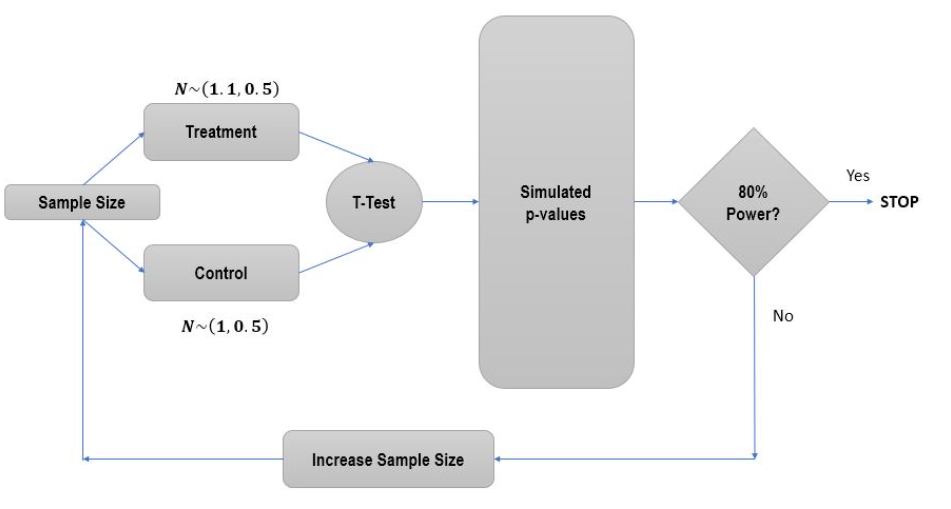



### ***Power Analysis - Part I***

Now we turn to power analysis. You typically want to ensure that any experiment or A/B test you run has at least 80% power. One way to ensure this is to ***calculate the sample size required to achieve 80% power***.

Suppose that you are in charge of a news media website and you are interested in increasing the amount of time users spend on your website. Currently, the time users spend on your website is normally distributed with a mean of 1 minute and a standard deviation of 0.5 minutes. Suppose that you are introducing a feature that loads pages faster and want to know the sample size required to measure a 5% increase in time spent on the website.

In this exercise, we will set up the framework to run one simulation, run a t-test, & calculate the p-value.

* Initialize `effect_size` to 5%, `control_mean` to `1` and `control_sd` to `0.5`.

* Using `np.random.normal()`, simulate one drawing of `control_time_spent` and `treatment_time_spent` using the values you initialized.

* Run a t-test on `treatment_time_spent` and `control_time_spent` using `st.ttest_ind()` where `st` is `scipy.stats`, which is already imported.

* Statistical significance `stat_sig` should be `True` if `p_value` is less than `0.05`, otherwise it should be `False`.

In [39]:
import numpy as np
import scipy.stats as st

np.random.seed(123)

# Initialize effect_size, control_mean, control_sd
effect_size, sample_size, control_mean, control_sd = 0.05, 50, 1, 0.5

# Simulate control_time_spent and treatment_time_spent, assuming equal variance
control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=sample_size)

# Run the t-test and get the p_value
t_stat, p_value = st.ttest_ind(treatment_time_spent, control_time_spent)
stat_sig = p_value < 0.05
print("P-value: {}, Statistically Significant? {}".format(p_value, stat_sig))

P-value: 0.5766409395002308, Statistically Significant? False


### ***Power Analysis - Part II***

Previously, we simulated one instance of the experiment & generated a p-value. We will now use this framework to calculate statistical power. Power of an experiment is the experiment's ability to detect a difference between treatment & control if the difference really exists. It's good statistical hygiene to strive for 80% power.

For our website, suppose we want to know how many people need to visit each variant, such that we can detect a 10% increase in time spent with 80% power. For this, we start with a small sample (50), simulate multiple instances of this experiment & check power. If 80% power is reached, we stop. If not, we increase the sample size & try again.

* For the `time_spent` random variables, set `size` as tuples such that `shape` is `sample_size` $\times$ `sims`.

* Calculate power as a fraction of p-values less than `0.05` (statistically significant).

* If power is greater than or equal to 80%, break out of the `while` loop. Else, keep incrementing `sample_size by 10`.

In [4]:
import numpy as np
import scipy.stats as st

np.random.seed(123)
effect_size = 0.1
control_mean, control_sd = 1, 0.5
sample_size = 50
sims = 1000

# Keep incrementing sample size by 10 till we reach required power
while 1:
    control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=(sample_size,sims))
    treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=(sample_size, sims))
    t, p = st.ttest_ind(treatment_time_spent, control_time_spent)
    
    # Power is the fraction of times in the simulation when the p-value was less than 0.05
    power = (p < 0.05).sum()/sims
    if power >= 0.8: 
        break
    else: 
        sample_size += 10
    if sample_size % 100 ==0:
        print(f'sample_size={sample_size}')
print("For 80% power, sample size required = {}".format(sample_size))


sample_size=100
sample_size=200
sample_size=300
For 80% power, sample size required = 360


Now you know how to estimate the sample size required to reach a given level of power.

### ***Portfolio Simulation - Part I***

In the next few exercises, you will calculate the expected returns of a stock portfolio & characterize its uncertainty.

Suppose you have invested $10,000 in your portfolio comprising of multiple stocks. You want to evaluate the portfolio's performance over 10 years. You can tweak your overall expected rate of return and volatility (standard deviation of the rate of return). Assume the rate of return follows a normal distribution.

First, let's write a function that takes the principal (initial investment), number of years, expected rate of return and volatility as inputs and returns the portfolio's total value after 10 years.

Upon completion of this exercise, you will have a function you can call to determine portfolio performance.

* In the function definition, accept four arguments: number of years `yrs`, the expected rate of return `avg_return`, volatility `sd_of_return`, and principal (initial investment) `principal` as inputs.

* Simulate rates of return for each year as a **normal** random variable.

* Initialize `end_return` to the `principal` input. In the `for` loop, `end_return` is scaled up by the rate each year.

* Use `portfolio_return()` to calculate and print result.

In [1]:
import numpy as np
np.random.seed(123)

# rates is a Normal random variable and has size equal to number of years
def portfolio_return(yrs, avg_return, volatility, principal):
    #np.random.seed(123)

    ### อย่าใส่ seed ไปในฟังก์ชัน มันจะ bug ###

    rates = np.random.normal(loc=avg_return, scale=volatility, size=yrs)
    # Calculate the return at the end of the period
    end_return = principal
    for x in rates:
        end_return = end_return*(1+x)
    return end_return

result = portfolio_return(yrs=5, avg_return=0.07, volatility=0.15, principal=1000)
print("Portfolio return after 5 years = {}".format(result))

Portfolio return after 5 years = 1021.4013412039292


### ***Portfolio Simulation - Part II***

Now we will use the simulation function you built to evaluate 10-year returns.

Your stock-heavy portfolio has an initial investment of $10,000, an expected return of 7% and a volatility of 30%. You want to get a 95% confidence interval of what your investment will be worth in 10 years. We will simulate multiple samples of 10-year returns and calculate the confidence intervals on the distribution of returns.

By the end of this exercise, you will have run a complete portfolio simulation.

The function `portfolio_return()` from the previous exercise is already initialized in the environment.

* Initialize `sims` to 1,000.

* Enter the appropriate values for the `portfolio_return()` function parameters.

* Calculate the 95% confidence interval lower (`lower_ci`) and upper limits (`upper_ci`).

In [2]:
import numpy as np
np.random.seed(123)

# Run 1,000 iterations and store the results
sims, rets = 1000, []

for i in range(sims):
    rets.append(portfolio_return(yrs=10, avg_return=0.07, 
                                 volatility=0.3, principal=10000))

# Calculate the 95% CI
lower_ci = np.percentile(rets, 2.5)
upper_ci = np.percentile(rets, 97.5)
print("95% CI of Returns: Lower = {}, Upper = {}".format(lower_ci, upper_ci))

95% CI of Returns: Lower = 1236.4468015417674, Upper = 79510.31743325583


### ***Portfolio Simulation - Part III***

Previously, we ran a complete simulation to get a distribution for 10-year returns. Now we will use simulation for decision making.

Let's go back to your stock-heavy portfolio with an expected return of 7% and a volatility of 30%. You have the choice of rebalancing your portfolio with some bonds such that the expected return is 4% & volatility is 10%. You have a principal of $10,000. You want to select a strategy based on how much your portfolio will be worth in 10 years. Let's simulate returns for both the portfolios and choose based on the least amount you can expect with 75% probability (25th percentile).

The `portfolio_return()` function is again pre-loaded in the environment.

* Set `avg_return` and `volatility` parameters to `0.07` and `0.3`, respectively, for the stock portfolio.

* Set `avg_return` and `volatility` parameters to `0.04` and `0.1`, respectively, for the bond portfolio.

* Calculate the 25th percentile of the distribution of returns for the stock `rets_stock_perc` and bond `rets_bond_perc` portfolios.

* Calculate and print how much additional returns `additional_returns` you would lose or gain by sticking with stocks instead of going to bonds.

In [4]:
rets_stock, rets_bond = [], []

for i in range(sims):
    rets_stock.append(portfolio_return(yrs=10, avg_return=0.07, volatility=0.3, principal=10000))
    rets_bond.append(portfolio_return(yrs=10, avg_return=0.04, volatility=0.1, principal=10000))

# Calculate the 25th percentile of the distributions and the amount you'd lose or gain
rets_stock_perc = np.percentile(rets_stock, 25)
rets_bond_perc = np.percentile(rets_bond, 25)
additional_returns = rets_stock_perc - rets_bond_perc
print("Sticking to stocks gets you an additional return of {}".format(additional_returns))

Sticking to stocks gets you an additional return of -5312.999858996807
